# Resale cars price prediction

In [342]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [343]:
cars= pd.read_csv('./Data sets for ML/cardekho.csv')

In [344]:
cars.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage(km/ltr/kg),engine,max_power,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248.0,74,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498.0,103.52,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.70,1497.0,78,5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.00,1396.0,90,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.10,1298.0,88.2,5.0


In [345]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   name                8128 non-null   object 
 1   year                8128 non-null   int64  
 2   selling_price       8128 non-null   int64  
 3   km_driven           8128 non-null   int64  
 4   fuel                8128 non-null   object 
 5   seller_type         8128 non-null   object 
 6   transmission        8128 non-null   object 
 7   owner               8128 non-null   object 
 8   mileage(km/ltr/kg)  7907 non-null   float64
 9   engine              7907 non-null   float64
 10  max_power           7913 non-null   object 
 11  seats               7907 non-null   float64
dtypes: float64(3), int64(3), object(6)
memory usage: 762.1+ KB


# Data cleaning 

In [346]:
cars.columns

Index(['name', 'year', 'selling_price', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner', 'mileage(km/ltr/kg)', 'engine', 'max_power',
       'seats'],
      dtype='object')

### removing duplicates 

In [360]:
cars=cars[~cars.duplicated(subset=['name', 'year', 'selling_price', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner', 'mileage(km/ltr/kg)', 'engine', 'max_power',
       'seats'])].reset_index(drop=True).copy()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage(km/ltr/kg),engine,max_power,seats,brands
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248.0,74.00,5.0,Maruti
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498.0,103.52,5.0,Skoda
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.70,1497.0,78.00,5.0,Honda
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.00,1396.0,90.00,5.0,Hyundai
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.10,1298.0,88.20,5.0,Maruti
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6921,Maruti Wagon R VXI BS IV with ABS,2013,260000,50000,Petrol,Individual,Manual,Second Owner,18.90,998.0,67.10,5.0,Maruti
6922,Hyundai i20 Magna 1.4 CRDi,2014,475000,80000,Diesel,Individual,Manual,Second Owner,22.54,1396.0,88.73,5.0,Hyundai
6923,Hyundai i20 Magna,2013,320000,110000,Petrol,Individual,Manual,First Owner,18.50,1197.0,82.85,5.0,Hyundai
6924,Hyundai Verna CRDi SX,2007,135000,119000,Diesel,Individual,Manual,Fourth & Above Owner,16.80,1493.0,110.00,5.0,Hyundai


# Basic EDA on selling price

### Univarient analysis

Text(0.5, 0, 'mileage km per liter')

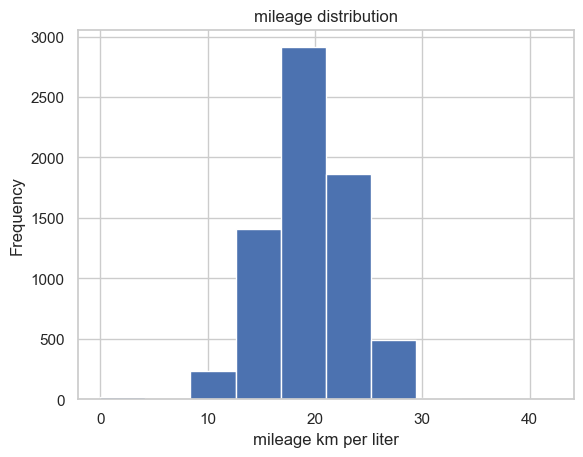

In [371]:
ax = cars['mileage(km/ltr/kg)'].plot(kind='hist', title='mileage distribution', bins=20)
ax.set_xlabel('mileage km per liter')
# ax.title('mileage distribution')

Text(0.5, 0, 'mileage km per liter')

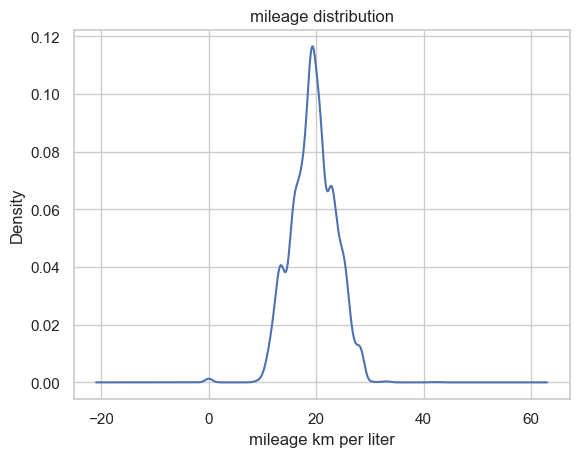

In [375]:
ax = cars['mileage(km/ltr/kg)'].plot(kind='kde', title='mileage distribution')
ax.set_xlabel('mileage km per liter')

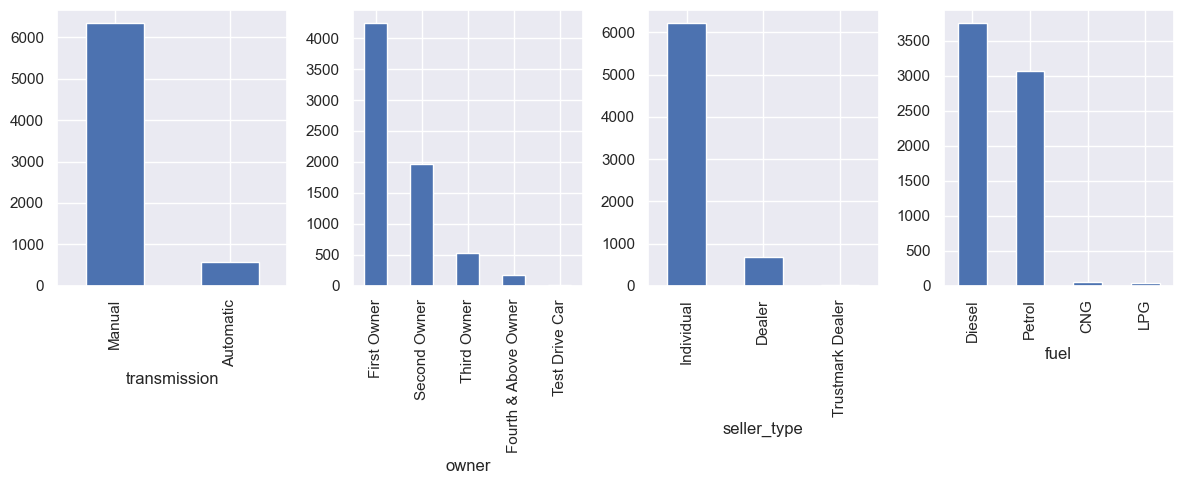

In [390]:
sns.set_theme()
fig, ax = plt.subplots(1,4, figsize=(12,5))
for i,j in enumerate(['transmission','owner','seller_type', 'fuel']):
    cars[j].value_counts().plot(kind='bar', ax=ax[i])
plt.tight_layout()


#### Feature relationship/ multi varient analysis

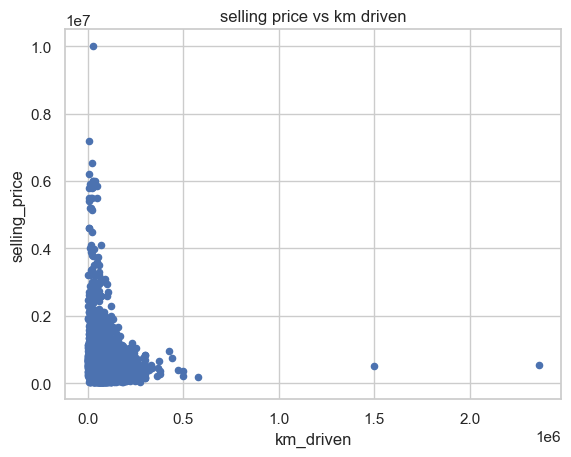

In [388]:
cars.plot(kind='scatter', y='selling_price', x='km_driven', title='selling price vs km driven')
plt.show()

### replacing nan values with median

In [350]:
 for i in ['mileage(km/ltr/kg)','engine','max_power','seats']:
        cars[i].fillna(cars[i].median(), inplace=True)

In [348]:
def isFloat(i):
    try:
        return float(i)
    except:
        return np.nan

In [349]:
cars['max_power']=cars.max_power.apply(isFloat)

In [351]:
cars['brands']=cars.name.apply(lambda x: x.split()[0])

In [352]:
cars.groupby('owner').selling_price.count()

owner
First Owner             4242
Fourth & Above Owner     169
Second Owner            1974
Test Drive Car             5
Third Owner              536
Name: selling_price, dtype: int64

In [353]:
cars.pivot_table(index=['fuel', 'owner'], values='selling_price', aggfunc='mean')

selling_price
fuel   owner                              
CNG    First Owner            3.540293e+05
       Fourth & Above Owner   1.895000e+05
       Second Owner           2.273529e+05
       Third Owner            1.823333e+05
Diesel First Owner            7.622038e+05
       Fourth & Above Owner   3.175174e+05
       Second Owner           4.849499e+05
       Test Drive Car         1.350000e+06
       Third Owner            3.729031e+05
LPG    First Owner            2.508824e+05
       Fourth & Above Owner   1.350000e+05
       Second Owner           1.640714e+05
       Third Owner            1.568000e+05
Petrol First Owner            4.518870e+05
       Fourth & Above Owner   1.263291e+05
       Second Owner           2.537343e+05
       Test Drive Car         5.167250e+06
       Third Owner            1.837663e+05

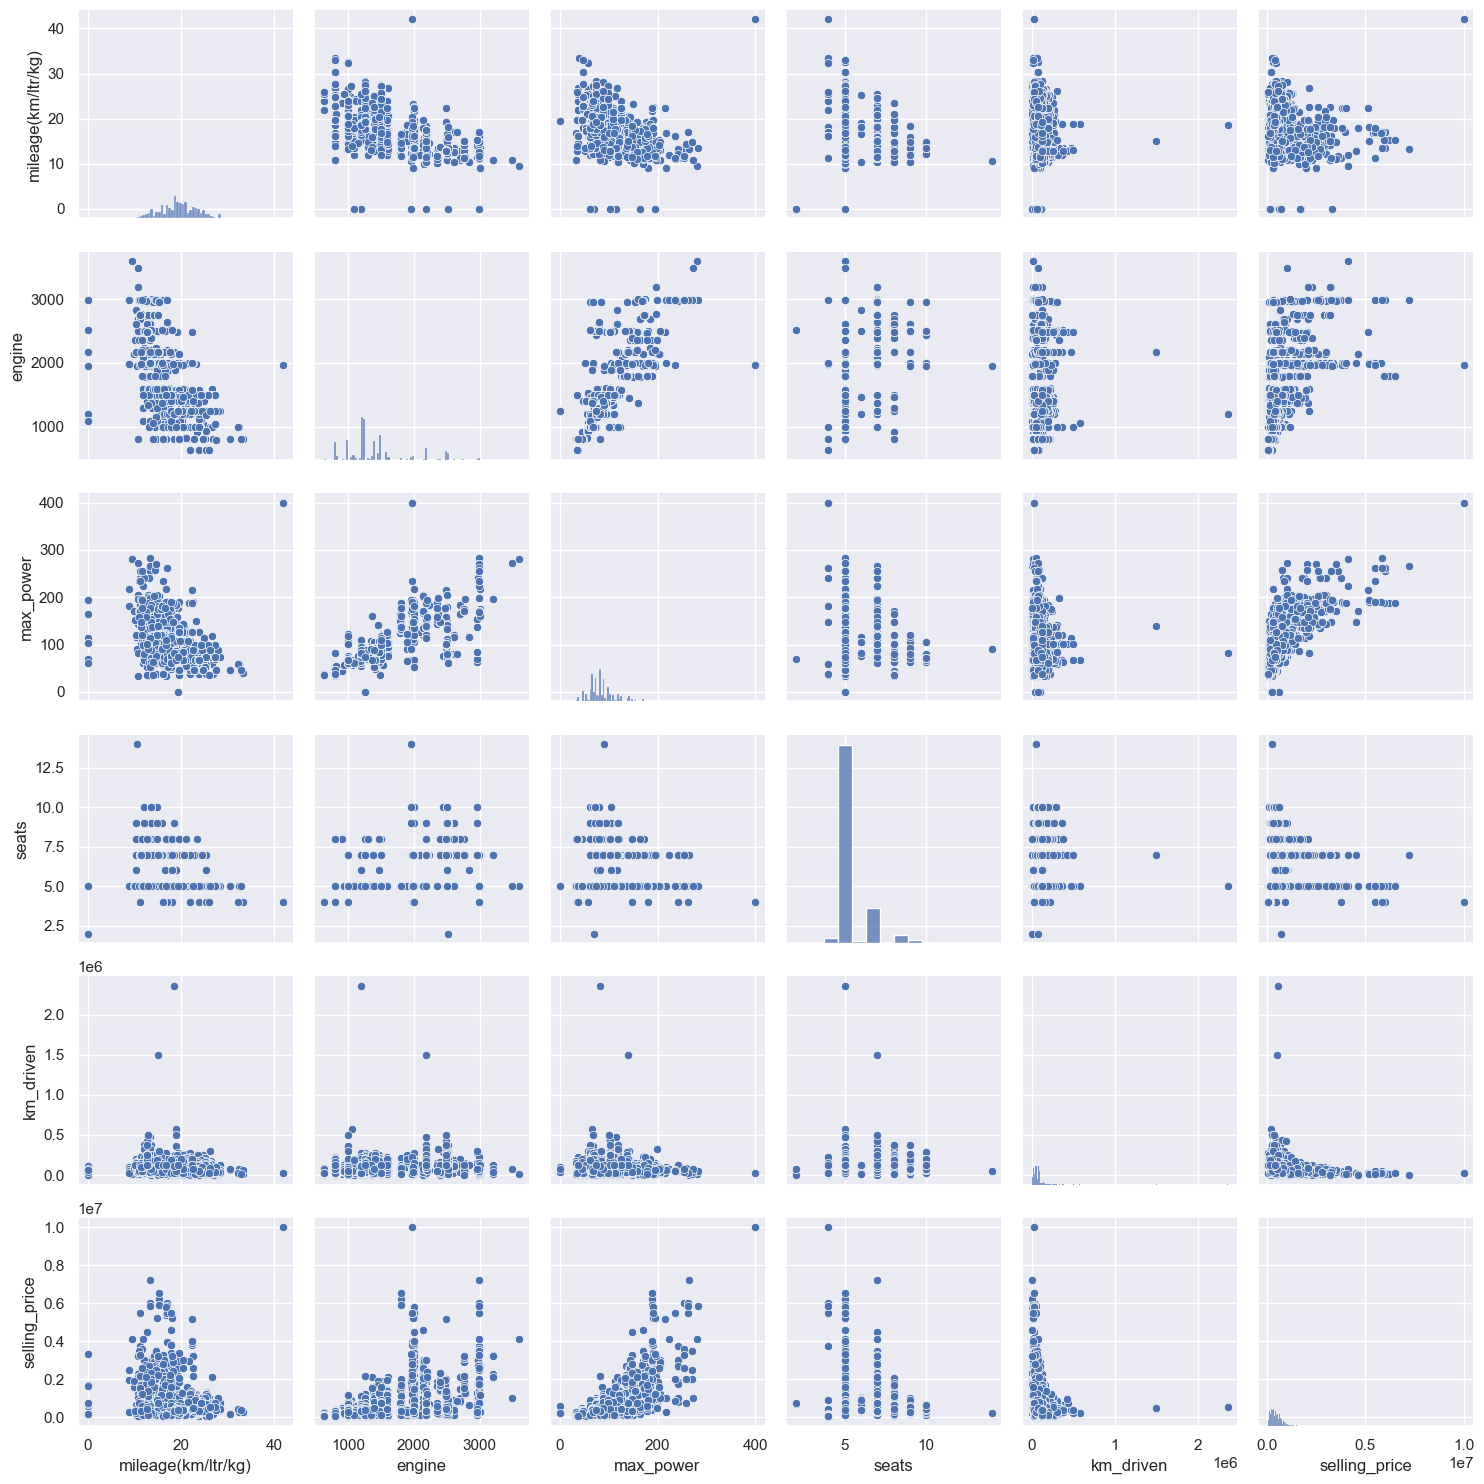

In [389]:
sns.set_theme(style='darkgrid')
sns.pairplot(cars,vars=["mileage(km/ltr/kg)", "engine", "max_power", "seats", "km_driven", "selling_price"])
plt.tight_layout()

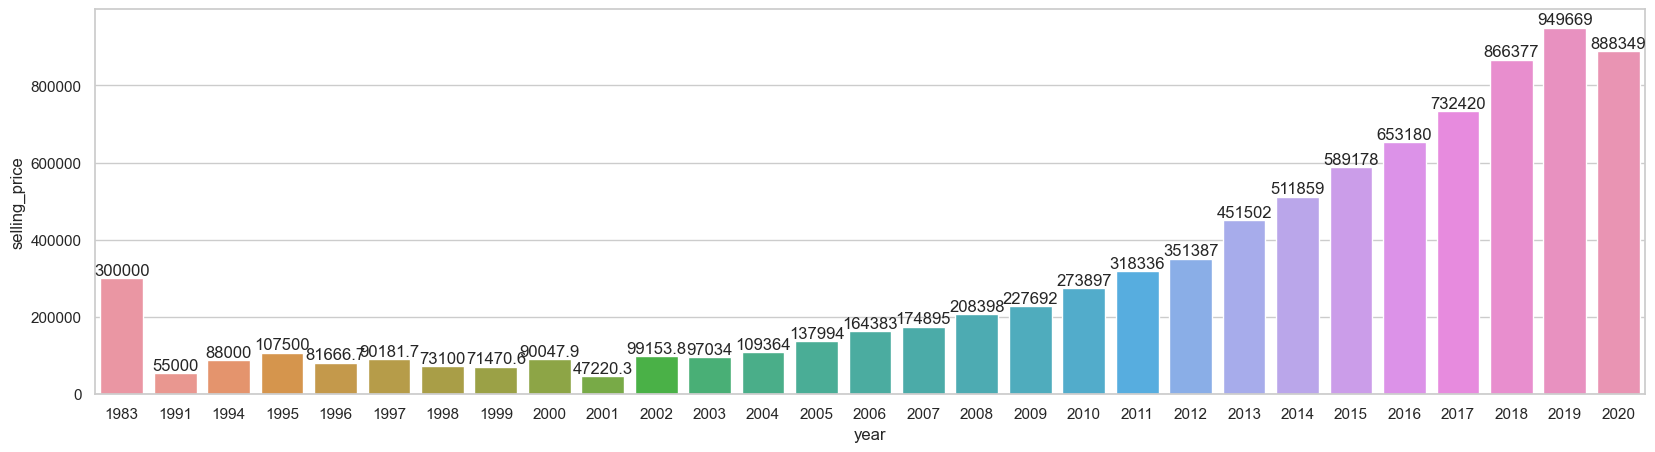

In [356]:

fig,axes=plt.subplots(figsize=(20,5))
y = cars.groupby('year').selling_price.mean()
x = cars.groupby('year').selling_price.mean().index
sns.barplot(x=x,y=y)
for container in axes.containers:
        axes.bar_label(container)
# axes.set_xticklabels(axes.get_xticklabels(), rotation=90)

In [357]:
def sellavg(name, meancol, axes):
    y = cars.groupby(name)[meancol].mean()
    x = cars.groupby(name)[meancol].mean().index
    z = cars.groupby(name)[meancol].count()
    sns.barplot(x=x,y=y, ax=axes[0])
    sns.barplot(x=x,y=z, ax=axes[1])
    for i in range(len(axes)):
        for container in axes[i].containers:
                axes[i].bar_label(container)
        axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=90)

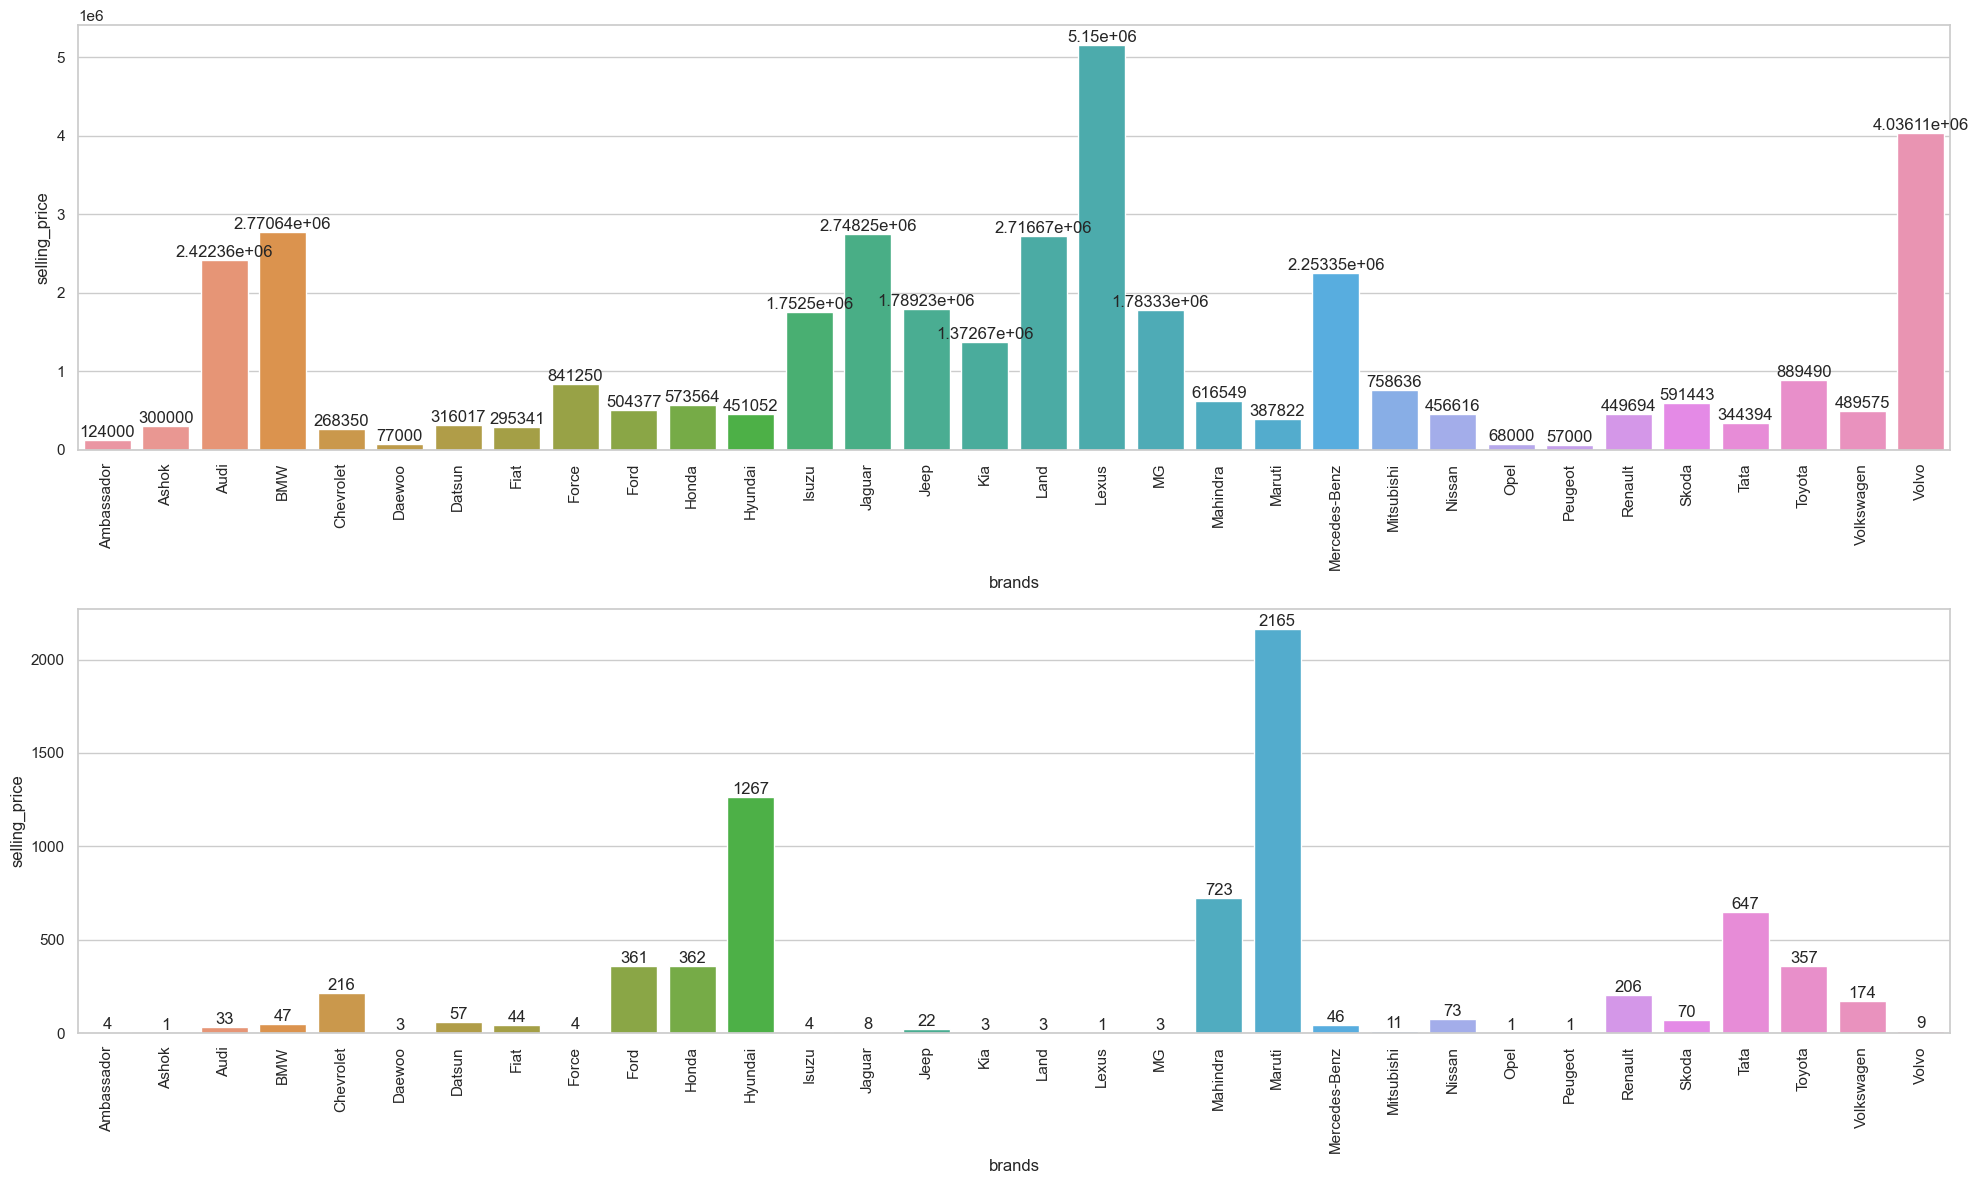

In [358]:
fig,axes=plt.subplots(2,1,figsize=(20,12))
sellavg('brands','selling_price', axes)
plt.tight_layout()

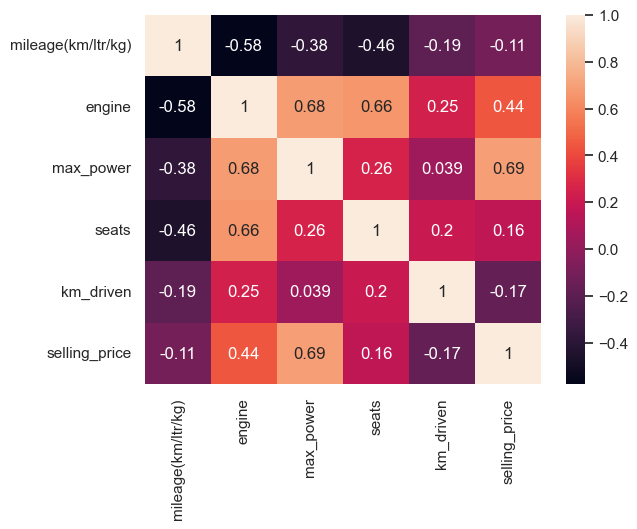

In [455]:
numericals = ["mileage(km/ltr/kg)", "engine", "max_power", "seats", "km_driven", "selling_price"]
corr = cars[numericals].corr()
sns.heatmap(corr, annot=True)
plt.show()

# Top 10 top mileage cars

In [398]:
cars.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage(km/ltr/kg),engine,max_power,seats,brands
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248.0,74.00,5.0,Maruti
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498.0,103.52,5.0,Skoda
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.70,1497.0,78.00,5.0,Honda
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.00,1396.0,90.00,5.0,Hyundai
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.10,1298.0,88.20,5.0,Maruti


In [400]:
cars[cars['mileage(km/ltr/kg)'] == cars['mileage(km/ltr/kg)'].max()]

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage(km/ltr/kg),engine,max_power,seats,brands
170,Volvo XC90 T8 Excellence BSIV,2017,10000000,30000,Petrol,Individual,Automatic,First Owner,42.0,1969.0,400.0,4.0,Volvo


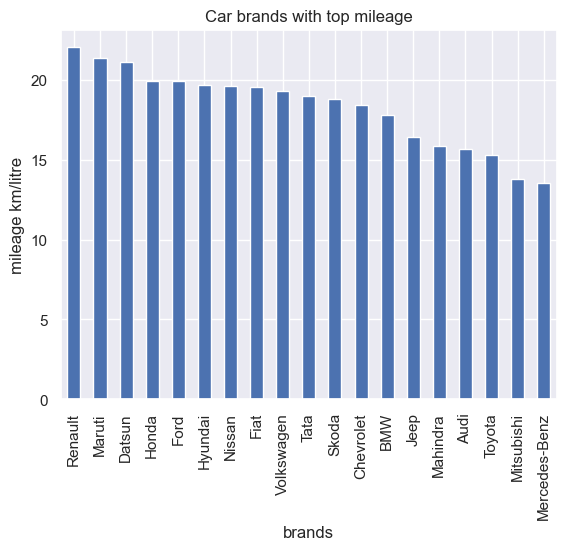

In [454]:
ax = cars.groupby('brands')['mileage(km/ltr/kg)'] \
    .agg(['mean', 'count']) \
    .query('count>=10') \
    .sort_values('mean',ascending=False)['mean'].plot(kind='bar',title='Car brands with top mileage')
ax.set_ylabel('mileage km/litre')
plt.show()

In [429]:
cars.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage(km/ltr/kg),engine,max_power,seats,brands
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248.0,74.00,5.0,Maruti
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498.0,103.52,5.0,Skoda
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.70,1497.0,78.00,5.0,Honda
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.00,1396.0,90.00,5.0,Hyundai
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.10,1298.0,88.20,5.0,Maruti


# top 10 latest sold cars 

In [440]:
top_sold_cars = cars.sort_values(by=['year','selling_price'], ascending=False).head(10).reset_index(drop=True)

In [438]:
top_sold_cars

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage(km/ltr/kg),engine,max_power,seats,brands
0,Volvo XC90 T8 Excellence BSIV,2017,10000000,30000,Petrol,Individual,Automatic,First Owner,42.00,1969.0,400.00,4.0,Volvo
1,BMW X7 xDrive 30d DPE,2020,7200000,5000,Diesel,Individual,Automatic,First Owner,13.38,2993.0,265.00,7.0,BMW
2,Audi A6 35 TFSI Matrix,2019,6523000,23600,Petrol,Dealer,Automatic,Test Drive Car,15.26,1798.0,187.74,5.0,Audi
3,Audi A6 35 TFSI Matrix,2019,6223000,7800,Petrol,Dealer,Automatic,Test Drive Car,15.26,1798.0,187.74,5.0,Audi
4,Mercedes-Benz S-Class S 350 CDI,2017,6000000,37000,Diesel,Dealer,Automatic,First Owner,13.50,2987.0,254.79,5.0,Mercedes-Benz
5,BMW 6 Series GT 630d Luxury Line,2018,6000000,27000,Diesel,Dealer,Automatic,First Owner,17.09,2993.0,261.40,4.0,BMW
6,BMW 6 Series GT 630d Luxury Line,2018,6000000,28156,Diesel,Dealer,Automatic,First Owner,17.09,2993.0,261.40,4.0,BMW
7,Audi A6 35 TFSI Matrix,2019,5923000,11500,Petrol,Dealer,Automatic,Test Drive Car,15.26,1798.0,187.74,5.0,Audi
8,Mercedes-Benz S-Class S 350 CDI,2017,5850000,47000,Diesel,Dealer,Automatic,First Owner,13.50,2987.0,282.00,5.0,Mercedes-Benz
9,BMW 6 Series GT 630d Luxury Line,2018,5830000,30000,Diesel,Individual,Automatic,First Owner,17.09,2993.0,261.40,4.0,BMW
